## Loading necessary libraries & SDKs

In [1]:
#
# Importing necessary libraries
#

import pandas as pd

#
# Importing libraries for visualization
#

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#
# Loading dataset
#

df = pd.read_csv('https://query.data.world/s/z4slg2pwckyuqqf6wy2dwdb7rj5kqc', encoding = "ISO-8859-1")

## Analyzing loaded data

In [3]:
#
# Interpreting rows and columns
#

print("Data info\n\nColumns:", df.shape[0], "\nRows:", df.shape[1])

Data info

Columns: 12491 
Rows: 12


In [4]:
#
# Interpreting types of data in dataset
#

print("Data Types:\n")
df.dtypes

Data Types:



UID                  int64
Name                object
Age                float64
Gender              object
Race                object
Date                object
City                object
State               object
Manner_of_death     object
Armed               object
Mental_illness        bool
Flee                  bool
dtype: object

In [5]:
#
# Calculating "Central Tendencies" of dataset
#

df.describe()

,UID,Age
count,12491.000000,12258.000000
mean,7759.543832,35.269538
std,4313.834339,12.979532
min,2.000000,1.000000
25%,4101.500000,25.000000
50%,7782.000000,33.000000
75%,11444.500000,44.000000
max,14980.000000,107.000000


In [6]:
#
# Inserting 'var' column to calculate variance of Age
#

age_column = df['Age']
summary = age_column.describe()
summary_std = summary['std'] ** 2

# now appending the value
summary['var'] = summary_std
summary.round(2)

count    12258.00
mean        35.27
std         12.98
min          1.00
25%         25.00
50%         33.00
75%         44.00
max        107.00
var        168.47
Name: Age, dtype: float64

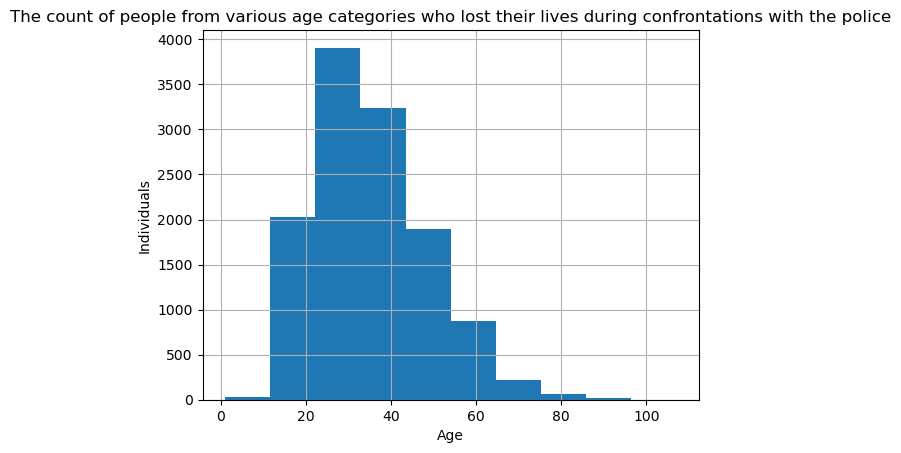

In [7]:
#
# Plotting a histogram for Age Column
#

plot_parameters = [ 
    "Age", 
    "Individuals", 
    "The count of people from various age categories who lost their lives during confrontations with the police" 
]

plot = age_column.hist()
plot.set_title(plot_parameters[2])
plot.set_xlabel(plot_parameters[0])
plot.set_ylabel(plot_parameters[1])
plt.show()

<Axes: xlabel='Manner_of_death', ylabel='count'>

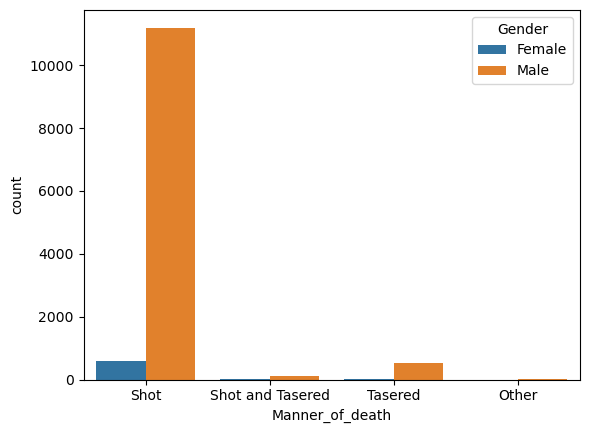

In [8]:
#
# Summary of Criminals' Death according to Gender and Death Manner
#

sns_parameters1 = [
    "Manner_of_death",
    "Gender"
]

sns.countplot(x = sns_parameters1[0], data = df, hue = sns_parameters1[1])

<Axes: xlabel='Mental_illness', ylabel='count'>

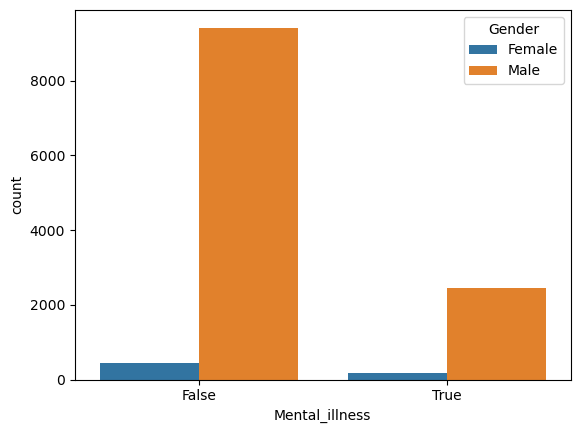

In [9]:
#
# Summary of Criminal's Mental Illness according to Gender
#

sns_parameters2 = [
    "Mental_illness",
    "Gender"
]

sns.countplot(x = sns_parameters2[0], data = df, hue = sns_parameters2[1])

## Preparing data for further analyses

In [10]:
#
# Calculating the number of Null Values
#

df.isna().sum()

UID                   0
Name                  0
Age                 233
Gender                8
Race               3965
Date                  0
City                  4
State                 0
Manner_of_death       0
Armed              5677
Mental_illness        0
Flee                  0
dtype: int64

<Axes: >

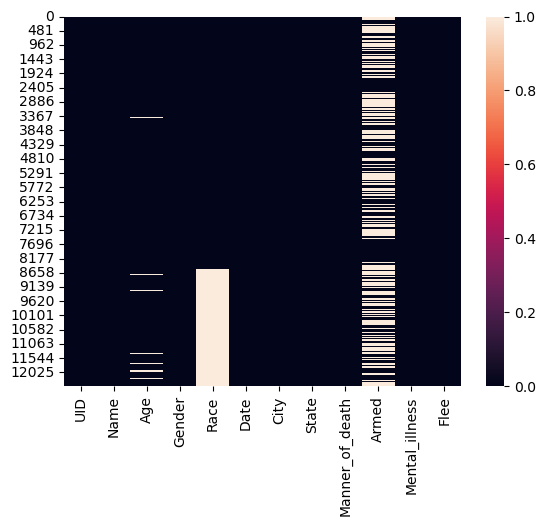

In [11]:
#
# Visualizing the number of Null Values using Seaborn Library
#

sns.heatmap(df.isna())

In [12]:
#
# Finding the % of null values in Age Column
#

( 
    age_column.isna().sum() 
    / 
    len( age_column ) 
) * 100

1.8653430469938355

In [13]:
#
# Since the null % is low for Age Column, let's replace them with Average(mean)
#

df['Age'].fillna(
    df['Age'].mean(), 
    inplace = True
)

In [14]:
#
# Verifying the Null Absence in Age Column
#

df['Age'].isna().sum()

0

In [15]:
#
# Since the null % in Race and Armed columns is comparatively high, let's drop them
#

df.drop(
    'Race', 
    axis = 1, 
    inplace = True
)

df.drop(
    'Armed', 
    axis = 1, 
    inplace = True
)

In [16]:
#
# Checking for Non-numeric Values
#

df.dtypes

UID                  int64
Name                object
Age                float64
Gender              object
Date                object
City                object
State               object
Manner_of_death     object
Mental_illness        bool
Flee                  bool
dtype: object

In [17]:
#
# Converting Gender Column to Numerical Values
#

sex = pd.get_dummies(
    df['Gender'], 
    drop_first = True
)

In [18]:
#
# Replacing Gender Column with new column 'Sex'
#

df['Sex'] = sex

In [19]:
#
# Converting Mental_illness Column to Numerical Values
#

mental = pd.get_dummies(
    df['Mental_illness'], 
    drop_first = True
)

In [20]:
#
# Replacing Mental_illness Column with new column 'Mental Illness'
#

df['Mental Illness'] = mental

In [21]:
#
# Converting Flee Column to Numerical Values
#

flee = pd.get_dummies(
    df['Flee'], 
    drop_first = True
)

In [22]:
#
# Replacing Flee Column with new column 'Running Away'
#

df['Running Away'] = flee

In [23]:
#
# Converting Age Column's Type into Integer
#

df['Age'] = df['Age'].astype(int)

In [24]:
#
# Dropping Unnecessary Columns
#

df.drop(
    [
        'Name',
        'Gender', 
        'Mental_illness', 
        'Date', 
        'Manner_of_death', 
        'City', 
        'State', 
        'Flee'
    ], 
    axis = 1, 
    inplace = True
)

In [25]:
#
# Checking the Result
#

df.head()

,UID,Age,Sex,Mental Illness,Running Away
0,133,44,0,0,0
1,169,26,1,0,0
2,257,36,1,0,0
3,483,29,1,0,0
4,655,25,1,0,0


#### Sex 
- 0 - Female
- 1 - Male 

#### Mental Illness
- 0 - False 
- 1 - True

In [26]:
#
# Separating Dependent and Independent Values
#

# Independent
x = df[
    [
        'UID', 
        'Age', 
        'Sex', 
        'Running Away'
    ]
]

# Dependent
y = df['Mental Illness']

In [27]:
#
# Importing Train Test Split Method & Scaling
#

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
#
# Splitting Dataset into Training and Testing
#

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size = 0.33
)

In [29]:
#
# Scaling
#

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Models Training

#### 1. Logistic Regression

In [30]:
#
# Importing Logistc Regression
#

from sklearn.linear_model import LogisticRegression

In [31]:
#
# Fitting Logistic Regression
#

lr = LogisticRegression()

lr.fit(
    x_train, 
    y_train
)

LogisticRegression()

In [32]:
#
# Predicting
#

lr_predict = lr.predict(x_test)

#### 2. Decision Tree

In [33]:
#
# Importing Decision Tree
#

from sklearn.tree import DecisionTreeClassifier

In [34]:
#
# Fitting Decision Tree
#

dt = DecisionTreeClassifier()

dt.fit(
    x_train, 
    y_train
)

DecisionTreeClassifier()

In [35]:
#
# Predicting
#

dt_predict = dt.predict(x_test)

#### 3. K-Nearest Neighbors

In [36]:
#
# Importing K-Nearest Neighbors
#

from sklearn.neighbors import KNeighborsClassifier

In [37]:
#
# Fitting K-Nearest Neighbors
#

knn = KNeighborsClassifier()

knn.fit(
    x_train, 
    y_train
)

KNeighborsClassifier()

In [38]:
#
# Predicting 
#

knn_predict = knn.predict(x_test)

#### 4. Naive Bayes

In [39]:
#
# Importing Naive Bayes
#

from sklearn.naive_bayes import GaussianNB

In [40]:
#
# Fitting Naive Bayes
#

nb = GaussianNB()

nb.fit(
    x_train, 
    y_train
)

GaussianNB()

In [41]:
#
# Predicting
#

nb_predict = nb.predict(x_test)

## Evaluation Models 

### Confusion Matrix

In [42]:
#
# Importing Confusion Matrix
#

from sklearn.metrics import confusion_matrix

In [43]:
#
# Confusion Matrix for Logistic Regression
#

pd.DataFrame(
    confusion_matrix(
        y_test, 
        lr_predict
    ),
    columns = [
        'Predicted No', 
        'Predicted Yes'
    ], 
    index = [
        'Actual No', 
        'Actual Yes'
    ]
)

,Predicted No,Predicted Yes
Actual No,3262,1
Actual Yes,860,0


In [44]:
#
# Confusion Matrix for Decision Tree
#

pd.DataFrame(
    confusion_matrix(
        y_test, 
        dt_predict
    ),
    columns = [
        'Predicted No', 
        'Predicted Yes'
    ], 
    index = [
        'Actual No', 
        'Actual Yes'
    ]
)

,Predicted No,Predicted Yes
Actual No,2572,691
Actual Yes,656,204


In [45]:
#
# Confusion Matrix for K-Nearest Neighbors
#

pd.DataFrame(
    confusion_matrix(
        y_test, 
        knn_predict
    ),
    columns = [
        'Predicted No', 
        'Predicted Yes',
    ], 
    index = [
        'Actual No', 
        'Actual Yes'
    ]
)

,Predicted No,Predicted Yes
Actual No,3031,232
Actual Yes,757,103


In [46]:
#
# Confusion Matrix for Naive Bayes
#

pd.DataFrame(
    confusion_matrix(
        y_test, 
        nb_predict
    ),
    columns = [
        'Predicted No', 
        'Predicted Yes'
    ], 
    index = [
        'Actual No', 
        'Actual Yes'
    ]
)

,Predicted No,Predicted Yes
Actual No,3107,156
Actual Yes,803,57


### Classification Metrics

In [47]:
#
# Importing Classification Metrics
#

from sklearn.metrics import classification_report

In [48]:
#
# Classification Metrics for Logistic Regression
#

print(
    classification_report(
        y_test, 
        lr_predict
    )
)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3263
           1       0.00      0.00      0.00       860

    accuracy                           0.79      4123
   macro avg       0.40      0.50      0.44      4123
weighted avg       0.63      0.79      0.70      4123



In [49]:
#
# Classification Metrics for Decision Tree
#

print(
    classification_report(
        y_test, 
        dt_predict
    )
)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3263
           1       0.23      0.24      0.23       860

    accuracy                           0.67      4123
   macro avg       0.51      0.51      0.51      4123
weighted avg       0.68      0.67      0.68      4123



In [50]:
#
# Classification Metrics for K-Nearest Neighbors
#

print(
    classification_report(
        y_test, 
        knn_predict
    )
)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3263
           1       0.31      0.12      0.17       860

    accuracy                           0.76      4123
   macro avg       0.55      0.52      0.52      4123
weighted avg       0.70      0.76      0.72      4123



In [51]:
#
# Classification Metrics for Naive Bayes
#

print(
    classification_report(
        y_test, 
        nb_predict
    )
)

              precision    recall  f1-score   support

           0       0.79      0.95      0.87      3263
           1       0.27      0.07      0.11       860

    accuracy                           0.77      4123
   macro avg       0.53      0.51      0.49      4123
weighted avg       0.68      0.77      0.71      4123

